Projeto Eletromag Etapa 1

In [ ]:
Imports dos módulos

In [99]:
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt
import peakutils

Variáveis do Transformador

In [100]:
R1 = 0.5
R2 = 0.5
L1 = 300e-3
L2 = 300e-3
C1 = 1e-6
C2 = 1e-6
w=1/sqrt(L1*C1)
k = 0.1
f = 1/(2*pi*sqrt(L1*C1))

In [101]:
XL1 = 1j*w*L1
XL2 = 1j*w*L2
XC1=1/(1j*w*C1)
XC2=1/(1j*w*C2)
M = k*sqrt(L1*L2)
XM = 1j*w*M
Uf = 10

In [102]:
def CalcularTransformador(V1, Rc):
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+((Rc*XC2)/(Rc+XC2))]])
    V=np.array([V1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

In [103]:
def S(V:complex, I:complex):
    """
    Calcula a potência total S do componente/sistema

    Parâmetros:
    - V: Tensão que passa no componente/sistema
    - I: Corrente que passa no componente/sistema
    - Z: Impedância local
    """

    Vpico = abs(V)
    Ipico = abs(I)
    Veficaz = Vpico/sqrt(2)
    Ieficaz = I/sqrt(2)
    Ief_conj = Ieficaz.conjugate()

    # print(f'Vef = {prettyPolar(Veficaz)}')
    # print(f'Ief = {prettyPolar(Ieficaz)}')
    # print(f'Ief_conj = {prettyPolar(Ief_conj)}')


    S = Veficaz*Ief_conj

    return S

In [104]:
Uf = 10
Rc = 10

#A função calcula as duas correntes
i1, i2 = CalcularTransformador(Uf, Rc)


#Com as correntes, é possível calcular o V2 
V2 = ((XC2*Rc)/(XC2+Rc)) * i2

#Potência 

S2=S(V2,i2)


print("Corrente no primario (i1)          --> {0:.5f} A".format(abs(i1)))
print("Corrente no secundário (i2)        --> {0:.5f} A".format(abs(i2)))
print("Tensão no secundário (V2)          --> {0:.5f} V".format(abs(V2)))
print("Potência eficaz (S2ef)             --> {0:.5f} W".format(S2.real))
print("Frequência de ressonância (f)      --> {0:.5f} Hz".format(f.real))


Corrente no primario (i1)          --> 1.81477 A
Corrente no secundário (i2)        --> 0.18150 A
Tensão no secundário (V2)          --> 1.81474 V
Potência eficaz (S2ef)             --> 0.01494 W
Frequência de ressonância (f)      --> 290.57584 Hz


Gráfico de Î1 e Î2 em função da frequência

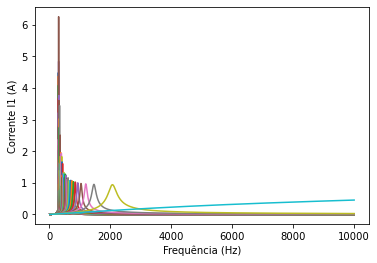

[]


In [108]:
lista_k=np.linspace(0,1,100)

lista_f= np.linspace(10,100e2,1000)

def ListaI1I2(lista_f,lista_k):
    I1=[]
    I2=[]
    for f in lista_f:
        
        M = lista_k*sqrt(L1*L2)
        w = 2*pi*f
        XL1 = 1j * w * L1
        XL2 = 1j * w * L2
        XM = 1j * w * M
        XC1 = 1/(1j*w*C1)
        XC2 = 1/(1j*w*C2)

        Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+(Rc*XC2)/(Rc+XC2)]])
        V=np.array([Uf,0])
        I=np.dot(linalg.inv(Z),V)

       
        I1.append(abs(I[0]))
        I2.append(abs(I[1]))

    return I1,I2

for k in lista_k:
    I1, I2 = ListaI1I2(lista_f,k)
    plt.plot(lista_f,I1,label="k")
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Corrente I1 (A)')
    # plt.legend(loc="lower left", ncol=5)
    index = peakutils.indexes(np.abs(I1), thres=0.1)
   
    
plt.show() 

print(index)

